# Clustering with Kohonen networks with compare with K-means


Import libraries

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

reading dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')
dat = ff.create_table(data.head())
py.iplot(dat)
dat.write_html("table.html")

In [3]:
# describing the data
desc = ff.create_table(data.describe())
py.iplot(desc)
desc.write_html("dec_table.html")

In [4]:
# checking if there is any NULL data
data.isnull().any().any()

False

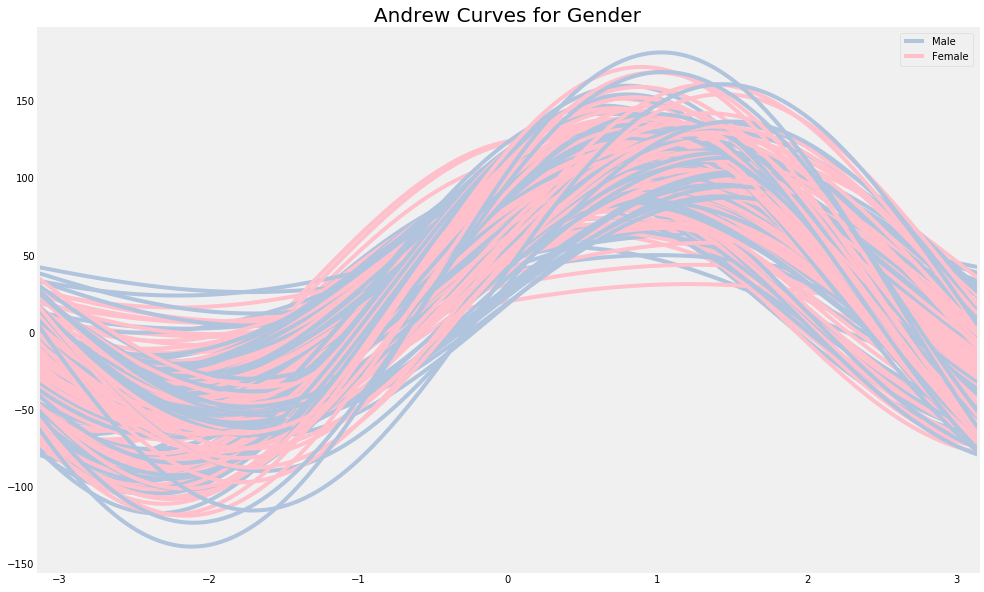

In [5]:
plt.rcParams['figure.figsize'] = (15, 10)
plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender", color = list(["lightsteelblue", "pink"]))
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

Можно заметить, что линии соответствующие похожим значениям также имеют и схожую форму.

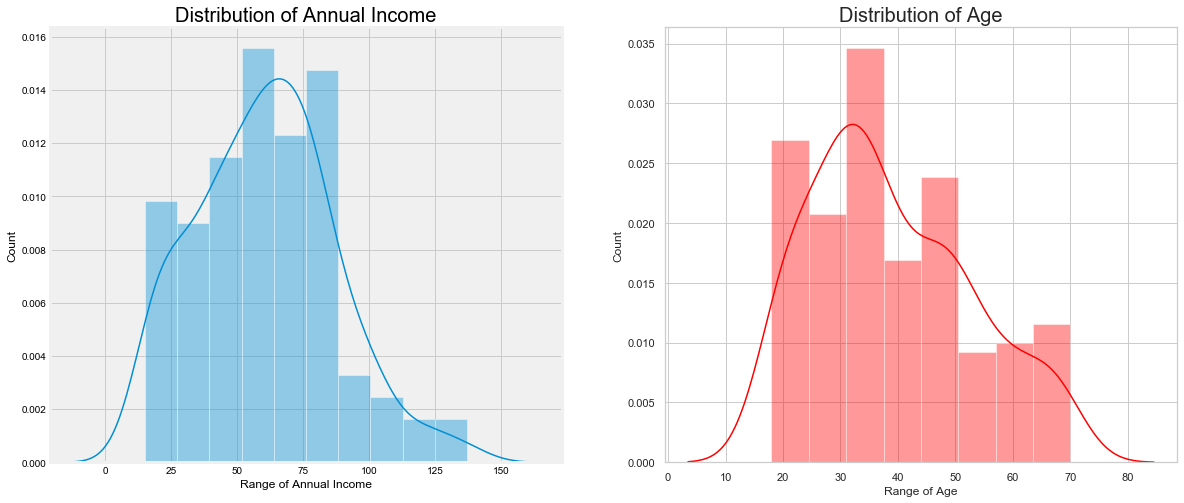

In [6]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Здесь, на приведенных выше графиках, мы можем увидеть картину распределения годового дохода и возраста, посмотрев на графики,
мы можем сделать один вывод: мало кто зарабатывает больше 100 долларов. Большинство людей зарабатывают около 50-75 долларов США. Кроме того, мы можем сказать, что наименьший доход составляет около 20 долларов США.
Делать выводы о клиентах.
Большинство постоянных клиентов торгового центра имеют возраст около 30-35 лет. В то время как возрастная группа пожилых граждан является наименее частым посетителем торгового центра. Молодежь-это меньшее число по сравнению с людьми среднего возраста.

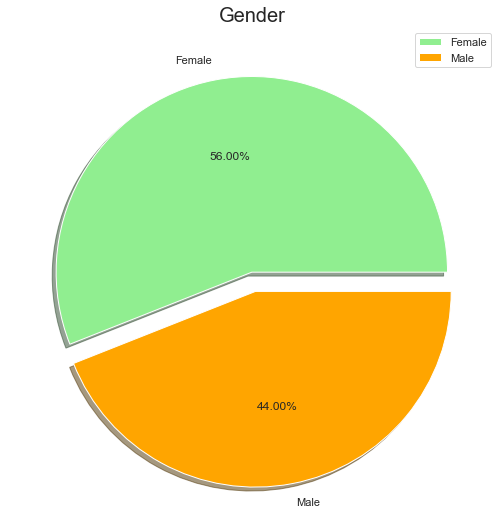

In [7]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Взглянув на приведенную выше круговую диаграмму, которая объясняет распределение полов в торговом центре

Интересно, что женщины лидируют с долей 56%, в то время как мужчины имеют долю 44%, что является огромным разрывом, особенно когда популяция мужчин сравнительно выше, чем женщин.

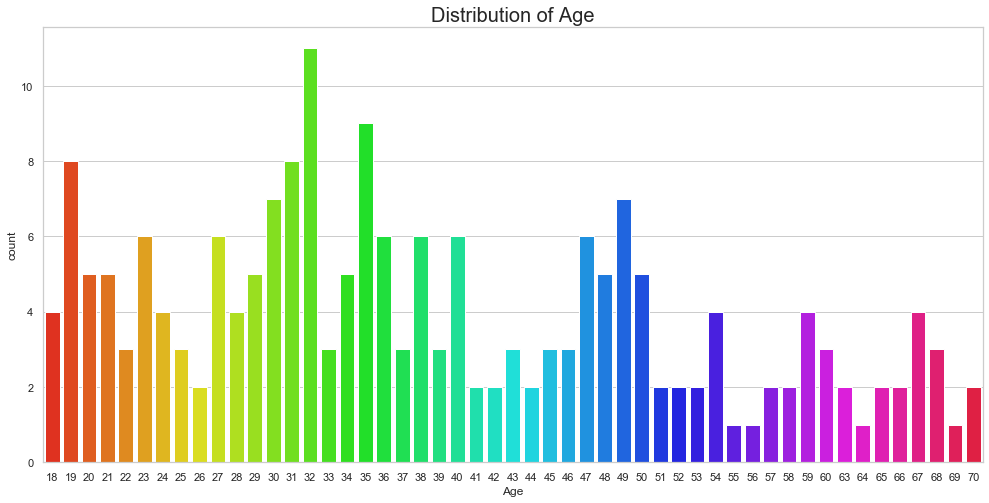

In [8]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

Этот график показывает более интерактивную диаграмму о распределении каждой возрастной группы в торговом центре для получения более подробной информации о возрастной группе посетителя в торговом центре.

Глядя на вышеприведенный график, можно увидеть, что возраст от 27 до 39 лет очень часто встречается, но четкой закономерности нет, мы можем найти только некоторые групповые закономерности, такие как старшие возрастные группы менее часты по сравнению с ними. Интересный факт: в торговом центре одинаково много посетителей в возрасте от 18 до 67 лет. Люди в возрасте 55, 56, 69, 64 лет встречаются в торговых центрах гораздо реже. Люди в возрасте 32 лет-Самые частые посетители торгового центра.

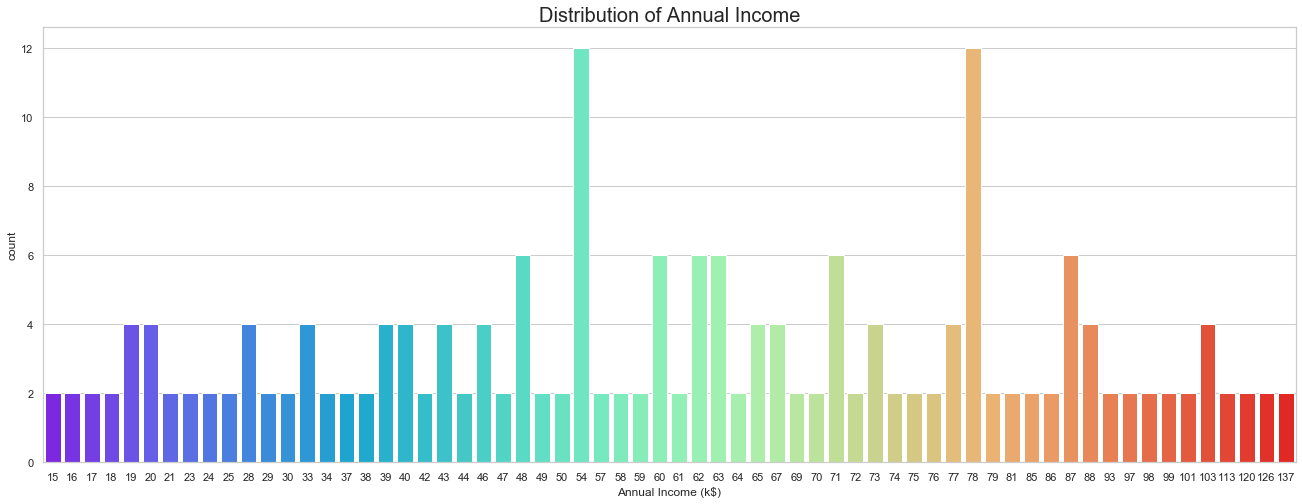

In [9]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

Опять же, это также диаграмма, чтобы лучше объяснить распределение каждого уровня дохода, интересно, что в торговом центре есть клиенты с очень сопоставимой частотой с их годовым доходом в диапазоне от 15 до 137 тысяч долларов США. В торговом центре больше клиентов, чей годовой доход составляет 54 тысячи долларов США или 78 долларов США.

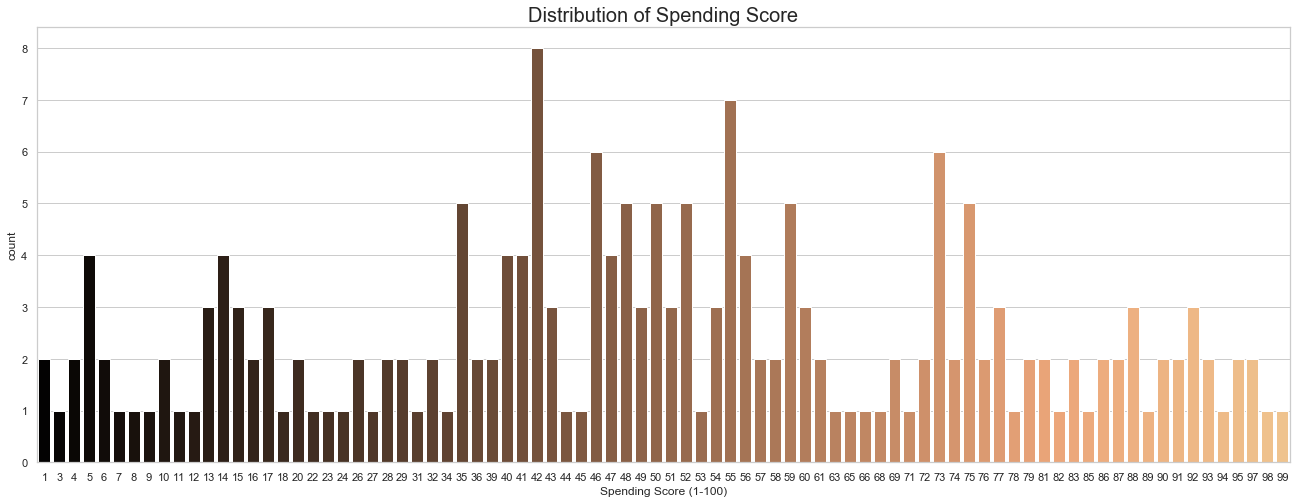

In [10]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

Это самая важная диаграмма с точки зрения торгового центра, так как очень важно иметь некоторую интуицию и представление о расходах клиентов, посещающих торговый центр.

На общем уровне можно сделать вывод, что большинство клиентов имеют свой показатель расходов в диапазоне 35-60. Интересно, что есть клиенты, у которых также есть оценка расходов I и оценка расходов 99, которая показывает, что торговый центр обслуживает множество клиентов с различными потребностями и требованиями, доступными в торговом центре.

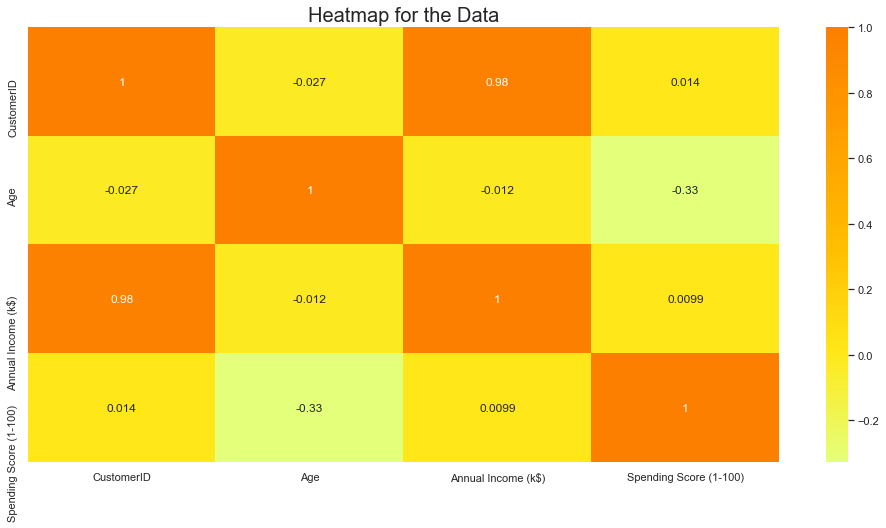

In [11]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

вывод: корреляции нет

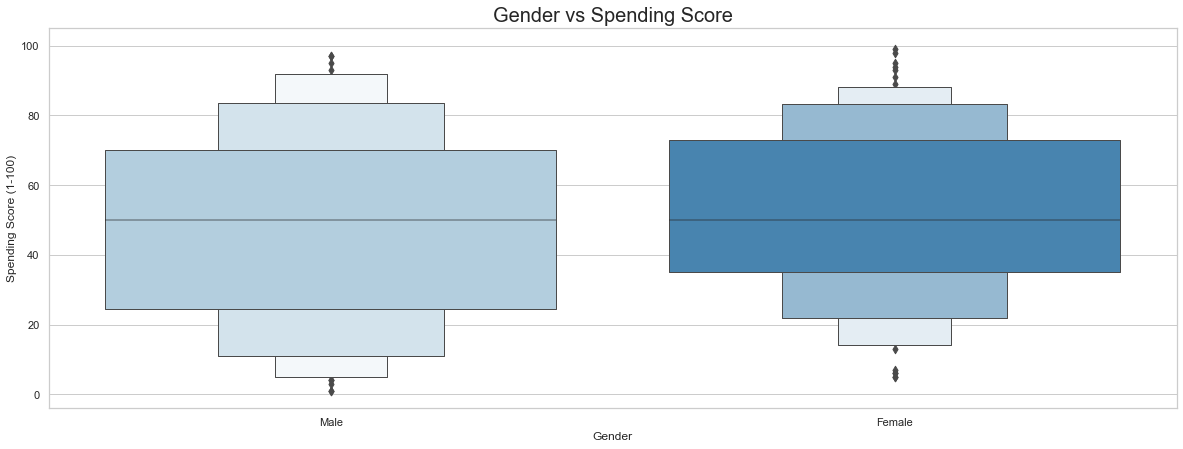

In [12]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Двухвариантный анализ между гендером и оценкой расходов,

Ясно видно, что большинство мужчин имеют показатель расходов от 25 до 70 тысяч долларов США, в то время как женщины имеют показатель расходов от 35 до 75 тысяч долларов США. что еще раз указывает на то, что женщины-лидеры шопинга.

**После того как проанализировали данные, приступим к кластерному анализу**

In [13]:
x_income = data.iloc[:, [3, 4]].values
x_income.shape

(200, 2)

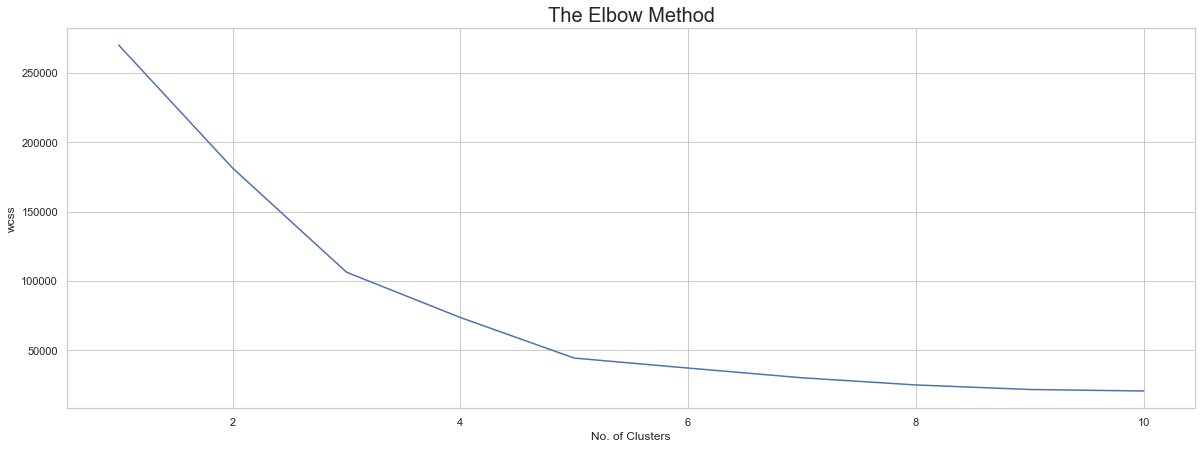

In [14]:
# найдем оптималное количсетво кластеров

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_income)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

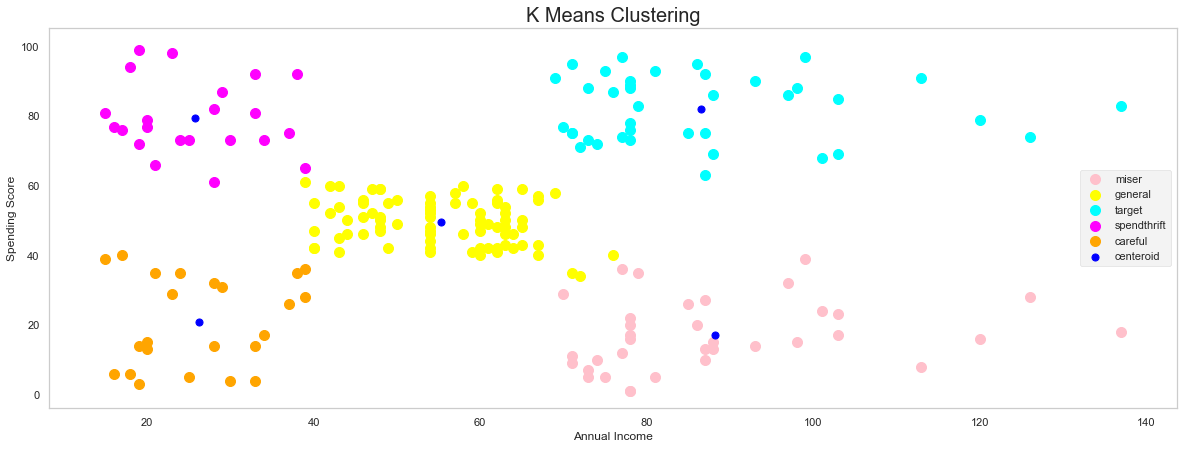

In [15]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x_income)

plt.scatter(x_income[y_means == 0, 0], x_income[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x_income[y_means == 1, 0], x_income[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x_income[y_means == 2, 0], x_income[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x_income[y_means == 3, 0], x_income[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x_income[y_means == 4, 0], x_income[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


In [16]:
y_means.dtype

dtype('int32')

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

In [28]:
import math
import random
import pandas as pd
import numpy as np

#случайные значения
W = []
K=5
M=len(x_income)
N = len(x_income[0])

la = 0.3 # коэффициент обучения
dla = 0.05 # уменьшение коэффициента обучения
epochs = 100
arr_for_paint=[]

# получить случайное значение для инициализирования весов       
def get_w():
    z = random.random() * (2.0 / math.sqrt(M))
    return 0.5 - (1 / math.sqrt(M)) + z
    
# инициализировать веса
for i in range(K):
    W.append([])
    for j in range(N):
        W[i].append(get_w() * 0.5)
        
# расстояние между векторами
def rho(w, x, dest):
    r = 0
    #эвклидово расстояние
    if dest == 0:
        for i in range(len(w)):
            r = r + (w[i] - x[i])*(w[i] - x[i])
        r = math.sqrt(r)
    # квадрат эвклидова расстояния
    elif dest == 1:
        for i in range(len(w)):
            r = r + (w[i] - x[i])*(w[i] - x[i])
        r = r*r
     # манхэтэнское расстояния
    elif dest == 2:
        for i in range(len(w)):
            r = r + abs((w[i] - x[i])*(w[i] - x[i]))
      # чэбышева
    elif dest == 3:
        for i in range(len(w)):
            max = 0
            r = abs(w[i] - x[i])*(w[i] - x[i])
            if r > max:
                max = r
        r = max
    return r

# поиск ближайшего вектора 
def FindNear(W, x):
    wm = W[0]
    r = rho(wm, x, 2)
    i = 0
    i_n = i
    for w in W:
        if rho(w, x, 2) < r:
            r = rho(w, x, 2)
            wm = w
            i_n = i
        i = i + 1
    return (wm, i_n)


def fit(la, x_income, W):
    Wk =[]
    # начать процесс обучения
    while la >= 0:
        for k in range(epochs): 
            for x in x_income:
                wm = FindNear(W, x)[0]
                for i in range(len(wm)):
                    wm[i] = wm[i] + la * (x[i] - wm[i]) # корректировка весов
                    arr_for_paint.append(wm) 
        la = la - dla # уменьшение коэффициента обучения
    return wm
fit(la, x_income, W)

# создать классы     
Data = list() 

for i in range(len(W)):
    Data.append(list())

# отнести исходные данные к своему классу    
DS = list()
i = 0
y_labels_kohonen=[]
for x in x_income:
    i_n = FindNear(W, x)[1]
    Data[i_n].append(x)
    DS.append([i_n, x_income[i]])
    y_labels_kohonen.append(i_n)
    i = i + 1
y_means = np.array(y_labels_kohonen)

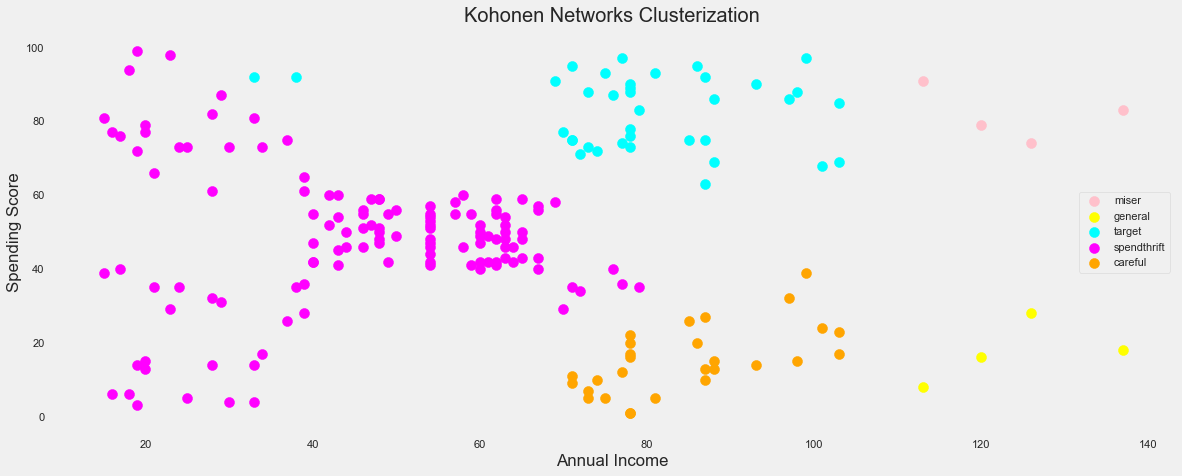

In [33]:
plt.scatter(x_income[y_means == 0, 0], x_income[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x_income[y_means == 1, 0], x_income[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x_income[y_means == 2, 0], x_income[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x_income[y_means == 3, 0], x_income[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x_income[y_means == 4, 0], x_income[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')

plt.style.use('fivethirtyeight')
plt.title('Kohonen Networks Clusterization', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [35]:
x_age = data.iloc[:, [2, 4]].values
x_age.shape

(200, 2)

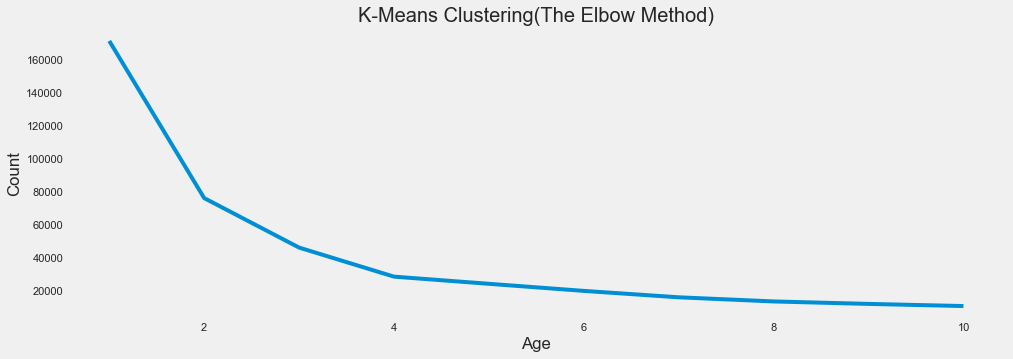

In [36]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_age)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

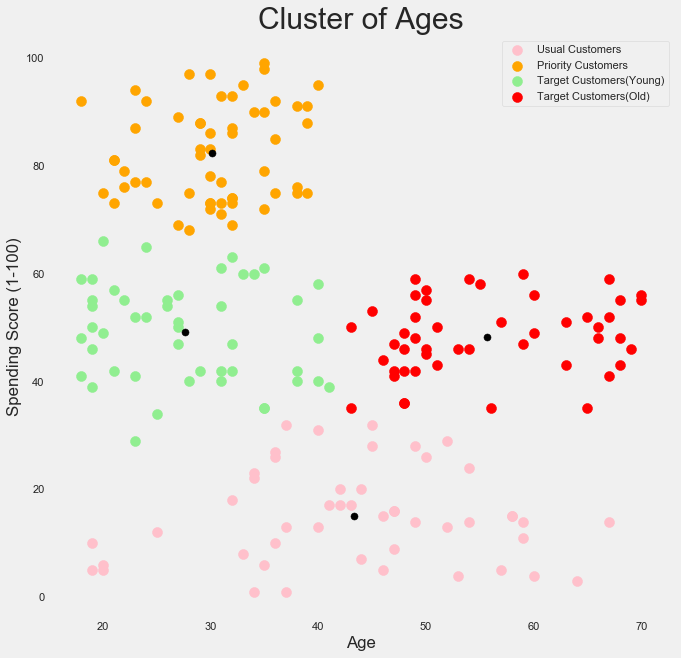

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x_age)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x_age[ymeans == 0, 0], x_age[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x_age[ymeans == 1, 0], x_age[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x_age[ymeans == 2, 0], x_age[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x_age[ymeans == 3, 0], x_age[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.

In [38]:

#случайные значения
W = []
K=5
M=len(x_age)
N = len(x_age[0])

la = 0.3 # коэффициент обучения
dla = 0.05 # уменьшение коэффициента обучения
epochs = 100
arr_for_paint=[]

# получить случайное значение для инициализирования весов       
def get_w():
    z = random.random() * (2.0 / math.sqrt(M))
    return 0.5 - (1 / math.sqrt(M)) + z
    
# инициализировать веса
for i in range(K):
    W.append([])
    for j in range(N):
        W[i].append(get_w() * 0.5)
        
# расстояние между векторами
def rho(w, x, dest):
    r = 0
    #эвклидово расстояние
    if dest == 0:
        for i in range(len(w)):
            r = r + (w[i] - x[i])*(w[i] - x[i])
        r = math.sqrt(r)
    # квадрат эвклидова расстояния
    elif dest == 1:
        for i in range(len(w)):
            r = r + (w[i] - x[i])*(w[i] - x[i])
        r = r*r
     # манхэтэнское расстояния
    elif dest == 2:
        for i in range(len(w)):
            r = r + abs((w[i] - x[i])*(w[i] - x[i]))
      # чэбышева
    elif dest == 3:
        for i in range(len(w)):
            max = 0
            r = abs(w[i] - x[i])*(w[i] - x[i])
            if r > max:
                max = r
        r = max
    return r

# поиск ближайшего вектора 
def FindNear(W, x):
    wm = W[0]
    r = rho(wm, x, 2)
    i = 0
    i_n = i
    for w in W:
        if rho(w, x, 2) < r:
            r = rho(w, x, 2)
            wm = w
            i_n = i
        i = i + 1
    return (wm, i_n)


def fit(la, x_age, W):
    Wk =[]
    # начать процесс обучения
    while la >= 0:
        for k in range(epochs): 
            for x in x_age:
                wm = FindNear(W, x)[0]
                for i in range(len(wm)):
                    wm[i] = wm[i] + la * (x[i] - wm[i]) # корректировка весов
                    arr_for_paint.append(wm) 
        la = la - dla # уменьшение коэффициента обучения
    return wm
fit(la, x_age, W)

# создать классы     
Data = list() 

for i in range(len(W)):
    Data.append(list())

# отнести исходные данные к своему классу    
DS = list()
i = 0
y_labels_kohonen=[]
for x in x_age:
    i_n = FindNear(W, x)[1]
    Data[i_n].append(x)
    DS.append([i_n, x_age[i]])
    y_labels_kohonen.append(i_n)
    i = i + 1
ymeans = np.array(y_labels_kohonen)

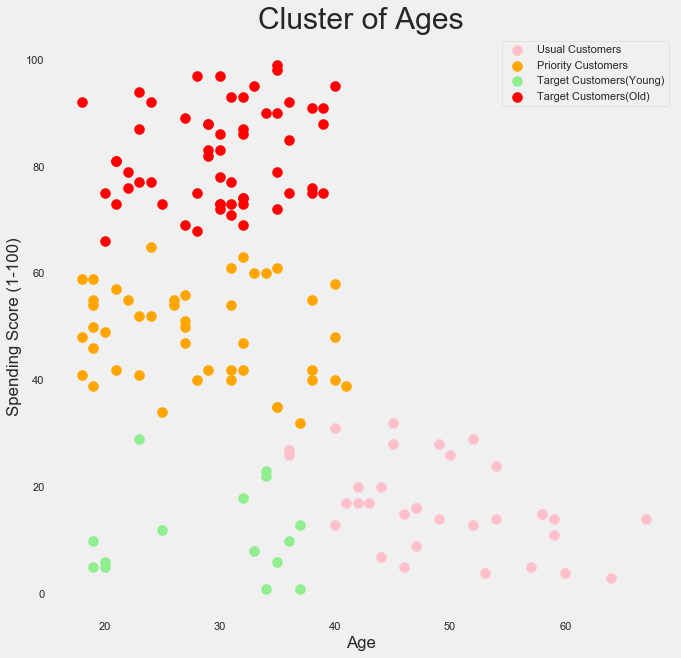

In [39]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x_age[ymeans == 0, 0], x_age[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x_age[ymeans == 1, 0], x_age[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x_age[ymeans == 2, 0], x_age[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x_age[ymeans == 3, 0], x_age[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')


plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [40]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [41]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)
fig.write_html("3d_cluster.html")

In [49]:
abs((2 - 1)*(3- 2)*(4-2))

2

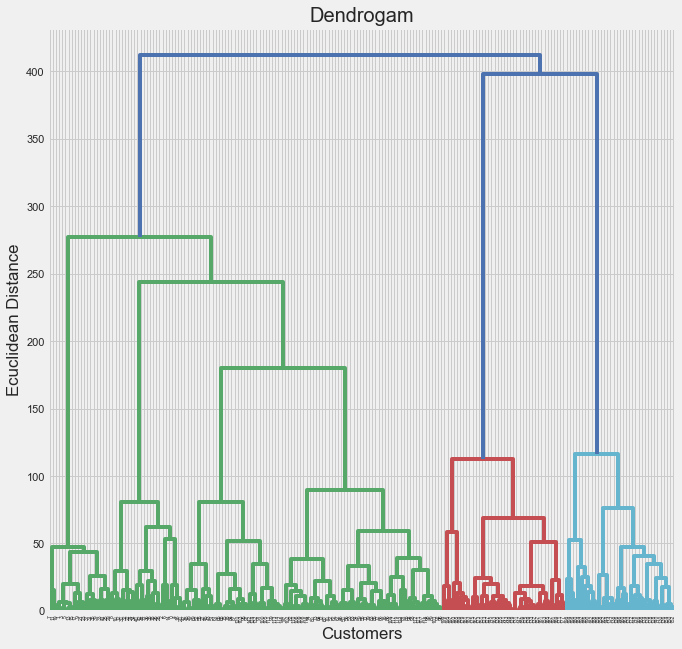

In [50]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

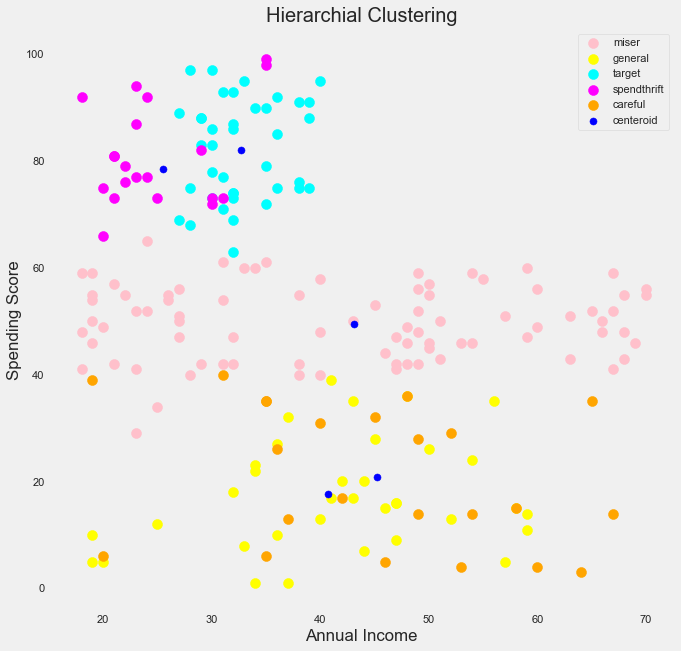

In [51]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()
